In [2]:
'''
Copyright (C) 2022 Francesco Paparella, Pedro Velasquez

This file is part of "ACCESS IOT Stations".

"ACCESS IOT Stations" is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by the Free
Software Foundation, either version 3 of the License, or (at your option) any
later version.

"ACCESS IOT Stations" is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or
FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more
details.

You should have received a copy of the GNU General Public License along with
"ACCESS IOT Stations". If not, see <https://www.gnu.org/licenses/>.
'''

%matplotlib widget
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Layout, HTML, Button, Box, VBox

In [3]:
# constant definitions
STATION = 'station1'
MONGO_IP = '10.224.83.51'
MONGO_PORT = 27017
DATABASE = 'stations'

In [4]:
# connect to MongoDB
client = MongoClient(host=MONGO_IP, port=MONGO_PORT)
db = client[DATABASE]

In [5]:
# collect wanted data
station_data = db[STATION].find_one({'month': '03_2023'})
x = station_data['gps']['datetime']
y = station_data['particulate_matter']['PM1count']['0']

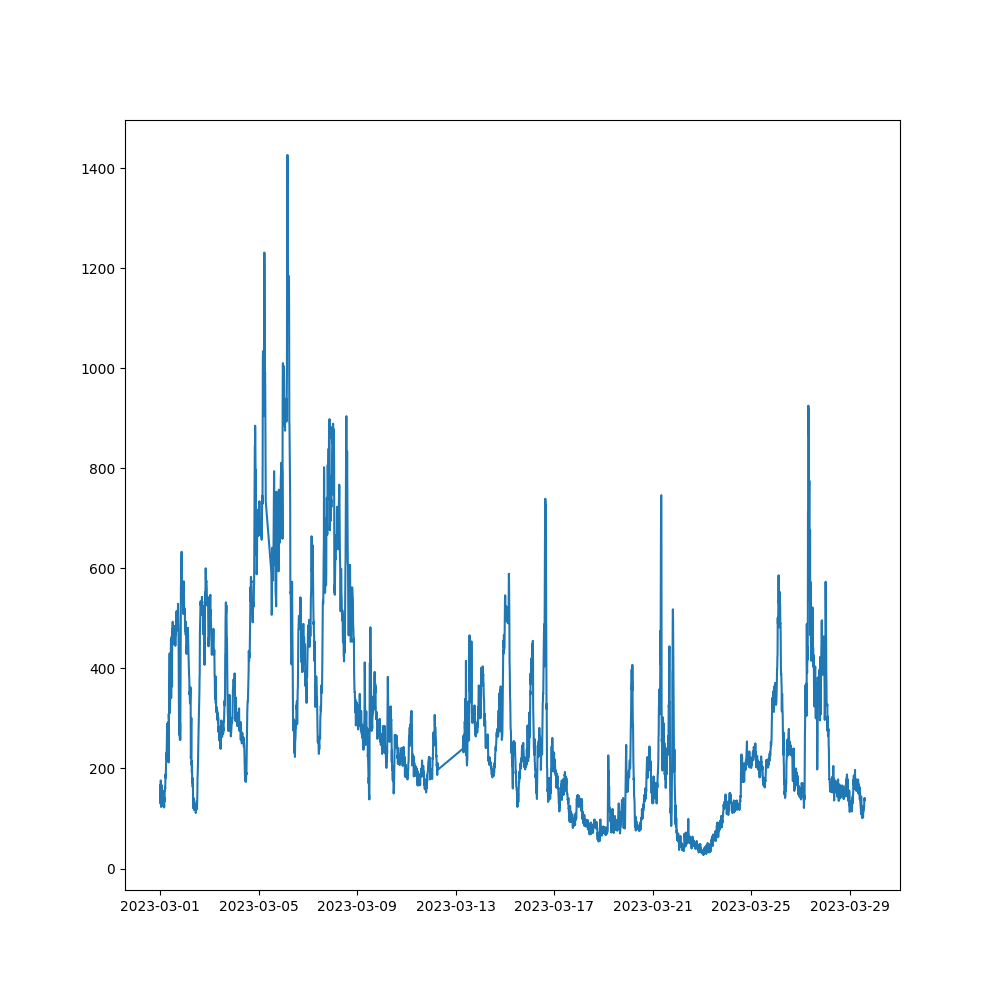

In [6]:
# setup plt plot
plt.ioff()  # avoids showing the plotting widget right here and now.
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout = Layout( 
    max_width='1000px', 
    max_height='1000px',
    border='solid')

graph = plt.plot(x, y)

#I still don't know how to layout correctly these widgets on the page.
# box_layout = Layout(#display='flex',
#                     flex_flow='row',
#                     #align_items='stretch',
#                     border='solid',
#                     width='100%',
#                     max_width='1050px')
# b = Box(children=[m, fig.canvas], layout=box_layout)
# display(fig)
display(fig.canvas)
#display(m)